In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("../data/raw/amazon_india_2015_2025.csv")
df.head(10)

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,...,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2015_00000001,2015-01-25,CUST_2015_00003884,PROD_000021,Samsung Galaxy S6 16GB Black,Electronics,Smartphones,Samsung,123614.29,27.91,...,True,Republic Day Sale,5.0,Delivered,1,2015,1,0.19,True,4.7
1,TXN_2015_00000002,2015-01-05,CUST_2015_00011709,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,...,False,NaN,4.5,Delivered,1,2015,1,0.20,True,4.1
2,TXN_2015_00000003,2015-01-24,CUST_2015_00004782,PROD_000039,Samsung Galaxy Note 5 64GB Black,Electronics,Smartphones,Samsung,97644.25,46.93,...,True,Republic Day Sale,NaN,Delivered,1,2015,1,0.17,True,3.3
3,TXN_2015_00000004,2015-01-28,CUST_2015_00008105,PROD_000085,Motorola Moto G (3rd Gen) 16GB Black,Electronics,Smartphones,Motorola,"21,947.26",0.00,...,False,NaN,3.0,Delivered,1,2015,1,0.22,True,3.5
4,TXN_2015_00000005,2015-01-31,CUST_2015_00002955,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,...,FALSE,NaN,4.0,Delivered,1,2015,1,0.20,True,4.1
5,TXN_2015_00000006,2015-01-04,CUST_2015_00006757,PROD_001665,Alienware MacBook 4GB RAM Black,Electronics,Laptops,Alienware,131194.65,0.00,...,False,NaN,4.5,Delivered,1,2015,1,1.39,No,3.6
6,TXN_2015_00000007,2015-01-27,CUST_2015_00008012,PROD_000031,Samsung Galaxy S6 Edge 64GB Black,Electronics,Smartphones,Samsung,86987.64,0.00,...,False,NaN,3.5,Delivered,1,2015,1,0.16,False,3.7
7,TXN_2015_00000008,2015-01-08,CUST_2015_00011809,PROD_000048,Samsung Galaxy J7 16GB White,Electronics,Smartphones,Samsung,32169.01,0.00,...,False,NaN,4.0,Returned,1,2015,1,0.19,False,4.6
8,TXN_2015_00000009,2015-01-18,CUST_2015_00006429,PROD_000082,Xiaomi Redmi Note 4G 32GB White,Electronics,Smartphones,Xiaomi,40264.16,0.00,...,False,NaN,5.0,Delivered,1,2015,1,0.22,True,3.4
9,TXN_2015_00000010,2015-01-03,CUST_2015_00001829,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,...,False,NaN,4.5,Returned,1,2015,1,0.20,True,4.1


In [3]:
df.shape

(1127609, 34)

- Question 1
- Your dataset contains order_date in multiple formats: 'DD/MM/YYYY', 'DD-MM-YY', 'YYYY-MM-DD', and some invalid entries like '32/13/2020'. Clean and standardize all dates to 'YYYY-MM-DD' format, handling invalid dates appropriately.

In [4]:
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce", format="mixed", dayfirst=True)

In [5]:
df["order_date"].dtypes

dtype('<M8[ns]')

In [6]:
df["order_date"].isna().sum()

np.int64(0)

In [7]:
df[df["transaction_id"] == "TXN_2015_00000040"]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,...,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
39,TXN_2015_00000040,2015-01-17,CUST_2015_00002912,PROD_001710,Lenovo Tab M10 8GB RAM Black,Electronics,Tablets,Lenovo,"₹56,337.89",0.0,...,False,NaN,NaN,Delivered,1,2015,1,0.49,True,4.1


- Identified multiple rows with invalid date format converted valid using below
- errors="coerce" is used to safely convert invalid date to NAT
- format="mixed", dayfirst=True is used to tell pandas that date are not only in indian format

- Question 2
- The original_price_inr column contains mixed data types: numeric values, text with '₹' symbols, comma separators ('₹1,25,000'), and some entries like 'Price on Request'. Clean this column to contain only numeric values in Indian Rupees.

In [8]:
df["original_price_inr"].head(25)

0     123614.29
1      54731.86
2      97644.25
3     21,947.26
4      54731.86
5     131194.65
6      86987.64
7      32169.01
8      40264.16
9      54731.86
10     88664.85
11     73967.02
12      72564.1
13    209875.55
14     45363.47
15     23075.71
16     23075.71
17    114096.63
18     69584.33
19     38884.19
20     46234.09
21     15065.01
22     54731.86
23    164166.84
24     64917.57
Name: original_price_inr, dtype: object

In [9]:
df["original_price_inr"].dtypes

dtype('O')

In [10]:
df[df["original_price_inr"] == "Price on Request"]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,...,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating


In [11]:
df["original_price_inr"] = df["original_price_inr"].str.replace("₹", "").str.replace(",","").str.strip()

In [12]:
df[df["transaction_id"] == "TXN_2015_00000040"]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,...,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
39,TXN_2015_00000040,2015-01-17,CUST_2015_00002912,PROD_001710,Lenovo Tab M10 8GB RAM Black,Electronics,Tablets,Lenovo,56337.89,0.0,...,False,NaN,NaN,Delivered,1,2015,1,0.49,True,4.1


In [13]:
df["original_price_inr"] = pd.to_numeric(df["original_price_inr"], errors="coerce")

In [14]:
df["original_price_inr"].isna().sum()

np.int64(33630)

In [15]:
df["original_price_inr"].dtypes

dtype('float64')

- Price column contained currency symbols, commas, and text values
- Removed ₹ symbol and separators
- Converted cleaned values to numeric
- Non-numeric values were safely converted to NaN

- Question 3
- Customer ratings appear in various formats: '5.0', '4 stars', '3/5', '2.5/5.0', and some missing values. Standardize all ratings to numeric scale 1.0-5.0, handling inconsistent formats and missing values strategically.


In [16]:
df["customer_rating"].head(20)

0           5.0
1           4.5
2           NaN
3           3.0
4           4.0
5           4.5
6           3.5
7           4.0
8           5.0
9           4.5
10          5.0
11          4.5
12          NaN
13          4/5
14          4.5
15          NaN
16    5.0 stars
17          NaN
18          4.5
19          NaN
Name: customer_rating, dtype: object

In [17]:
df["customer_rating"].dtype

dtype('O')

In [18]:
import re 

def clean_rating(val):
    val = val.lower().strip()
    if val in ["nan", "none", "null", ""]:
        return None
    if "/" in val:
        try:
            return float(val.split("/")[0])
        except:
            return None
    num = re.search(r"\d+(\.\d+)?", val)
    if num:
        return float(num.group())
    return None

In [19]:
print(clean_rating("2werwe"))

2.0


In [20]:
#df["customer_rating"] = df["customer_rating"].apply(clean_rating)

In [21]:
df["customer_rating"] = df["customer_rating"].astype(str)

In [22]:
df["customer_rating"].dtype

dtype('O')

In [23]:
df["customer_rating"] = df["customer_rating"].apply(clean_rating)

In [24]:
df[df["customer_rating"] < 0]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,...,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating


In [25]:
df[df["customer_rating"] > 5]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,...,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating


In [26]:
df["customer_rating"].isna().mean() * 100

np.float64(30.302702443843565)

In [27]:
df["customer_rating"].dtypes

dtype('float64')

- Ratings appeared in multiple formats such as numeric, text based, and fractional
- Extracted numeric rating values using regex
- Invalid and missing ratings were converted to NAN

- Question 4
- The customer_city column has inconsistent naming: 'Bangalore/Bengaluru', 'Mumbai/Bombay', 'Delhi/New Delhi', along with spelling errors and case variations. Standardize all city names and handle geographical variations.


In [28]:
df["customer_city"].unique()

array(['Mumbai', 'Allahabad', 'Kolkata', 'Ludhiana', 'Delhi', 'Lucknow',
       'Jaipur', 'Bhubaneswar', 'Ahmedabad', 'Bangalore', 'Pune', 'Kochi',
       'Chennai', 'Nagpur', 'Visakhapatnam', 'mumba', 'Gorakhpur',
       'Bombay', 'Kanpur', 'Chandigarh', 'Hyderabad', 'Aligarh', 'Indore',
       'Patna', 'Meerut', 'Coimbatore', 'Vadodara', 'Saharanpur',
       'Bareilly', 'BANGALORE', 'Moradabad', 'New Delhi', 'Surat',
       'KOLKATA', 'Banglore', 'Madras', 'chenai', 'Delhi NCR', 'Varanasi',
       'Bengalore', 'Bengaluru', 'MUMBAI', 'Kolkata ', 'Calcutta',
       'delhi', 'CHENNAI', 'Chennai ', 'kolkata', 'Mumbai ', 'DELHI'],
      dtype=object)

In [29]:
df["customer_city"] = df["customer_city"].str.lower().str.strip()

In [30]:
df["customer_city"].unique()

array(['mumbai', 'allahabad', 'kolkata', 'ludhiana', 'delhi', 'lucknow',
       'jaipur', 'bhubaneswar', 'ahmedabad', 'bangalore', 'pune', 'kochi',
       'chennai', 'nagpur', 'visakhapatnam', 'mumba', 'gorakhpur',
       'bombay', 'kanpur', 'chandigarh', 'hyderabad', 'aligarh', 'indore',
       'patna', 'meerut', 'coimbatore', 'vadodara', 'saharanpur',
       'bareilly', 'moradabad', 'new delhi', 'surat', 'banglore',
       'madras', 'chenai', 'delhi ncr', 'varanasi', 'bengalore',
       'bengaluru', 'calcutta'], dtype=object)

In [31]:
city_mapping = {
    "bangalore": "bangalore",
    "banglore": "bangalore",
    "bengalore": "bangalore",
    "bengaluru": "bangalore",

    "mumbai": "mumbai",
    "mumba": "mumbai",
    "bombay": "mumbai",

    "chennai": "chennai",
    "chenai": "chennai",
    "madras": "chennai",

    "delhi": "delhi",
    "new delhi": "delhi",
    "delhi ncr": "delhi",

    "kolkata": "kolkata",
    "calcutta": "kolkata"
}
df["customer_city"] = df["customer_city"].replace(city_mapping)

In [32]:
df["customer_city"].unique()

array(['mumbai', 'allahabad', 'kolkata', 'ludhiana', 'delhi', 'lucknow',
       'jaipur', 'bhubaneswar', 'ahmedabad', 'bangalore', 'pune', 'kochi',
       'chennai', 'nagpur', 'visakhapatnam', 'gorakhpur', 'kanpur',
       'chandigarh', 'hyderabad', 'aligarh', 'indore', 'patna', 'meerut',
       'coimbatore', 'vadodara', 'saharanpur', 'bareilly', 'moradabad',
       'surat', 'varanasi'], dtype=object)

- Changed all duplicate and wrong spelled cities to unique ones

- Question 5
- Boolean columns (is_prime_member, is_prime_eligible, is_festival_sale) contain mixed values: True/False, Yes/No, 1/0, Y/N, and some missing entries. Convert all boolean columns to consistent True/False format.

In [33]:
df.head()

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,...,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2015_00000001,2015-01-25,CUST_2015_00003884,PROD_000021,Samsung Galaxy S6 16GB Black,Electronics,Smartphones,Samsung,123614.29,27.91,...,True,Republic Day Sale,5.0,Delivered,1,2015,1,0.19,True,4.7
1,TXN_2015_00000002,2015-01-05,CUST_2015_00011709,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,...,False,NaN,4.5,Delivered,1,2015,1,0.20,True,4.1
2,TXN_2015_00000003,2015-01-24,CUST_2015_00004782,PROD_000039,Samsung Galaxy Note 5 64GB Black,Electronics,Smartphones,Samsung,97644.25,46.93,...,True,Republic Day Sale,NaN,Delivered,1,2015,1,0.17,True,3.3
3,TXN_2015_00000004,2015-01-28,CUST_2015_00008105,PROD_000085,Motorola Moto G (3rd Gen) 16GB Black,Electronics,Smartphones,Motorola,21947.26,0.00,...,False,NaN,3.0,Delivered,1,2015,1,0.22,True,3.5
4,TXN_2015_00000005,2015-01-31,CUST_2015_00002955,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,...,FALSE,NaN,4.0,Delivered,1,2015,1,0.20,True,4.1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127609 entries, 0 to 1127608
Data columns (total 34 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   transaction_id          1127609 non-null  object        
 1   order_date              1127609 non-null  datetime64[ns]
 2   customer_id             1127609 non-null  object        
 3   product_id              1127609 non-null  object        
 4   product_name            1127609 non-null  object        
 5   category                1127609 non-null  object        
 6   subcategory             1127609 non-null  object        
 7   brand                   1127609 non-null  object        
 8   original_price_inr      1093979 non-null  float64       
 9   discount_percent        1127609 non-null  float64       
 10  discounted_price_inr    1127609 non-null  float64       
 11  quantity                1127609 non-null  int64         
 12  subtotal_inr  

In [35]:
df[["is_prime_member", "is_prime_eligible", "is_festival_sale"]].value_counts()

is_prime_member  is_prime_eligible  is_festival_sale
False            True               False               297231
True             True               False               183633
False            True               True                134041
True             True               True                 81545
False            False              False                65293
                                                         ...  
Yes              No                 FALSE                    1
                                    Yes                      1
                                    No                       1
                 TRUE               1                        1
0                0                  FALSE                    1
Name: count, Length: 479, dtype: int64

In [36]:
print(df["is_festival_sale"].dtype)
print(df["is_prime_eligible"].dtype)
print(df["is_prime_member"].dtype)

object
object
object


In [37]:
print(df["is_prime_member"].unique())
print(df["is_festival_sale"].unique())
print(df["is_prime_eligible"].unique())

print(df["is_prime_member"].isnull().sum())
print(df["is_festival_sale"].isnull().sum())
print(df["is_prime_eligible"].isnull().sum())

['No' 'False' 'FALSE' '0' 'True' '1' 'TRUE' 'Yes']
['True' 'False' 'FALSE' 'No' '0' '1' 'Yes' 'TRUE']
['True' 'No' 'False' 'TRUE' '1' 'Yes' '0' 'FALSE']
0
0
0


In [38]:
def clean_boolean(val):
    val = str(val).strip().lower()
    if val in ["true", "yes", "1"]:
        return True
    else:
        return False

In [39]:
df["is_festival_sale"] = df["is_festival_sale"].apply(clean_boolean)
df["is_prime_member"] = df["is_prime_member"].apply(clean_boolean)
df["is_prime_eligible"] = df["is_prime_eligible"].apply(clean_boolean)

In [40]:
print(df["is_prime_member"].unique())
print(df["is_festival_sale"].unique())
print(df["is_prime_eligible"].unique())

[False  True]
[ True False]
[ True False]


In [41]:
print(df["is_festival_sale"].dtype)
print(df["is_prime_eligible"].dtype)
print(df["is_prime_member"].dtype)

bool
bool
bool


- Identified mixed boolean representations (Yes/No, 1/0, True/False. TRUE/FALSE)
- standardize boolean values
- Created clean boolean columns

- Question 6
- Product categories have variations: 'Electronics/Electronic/ELECTRONICS/Electronics & Accessories'. Standardize category names across the dataset and ensure consistent naming conventions.


In [42]:
df.columns

Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'festival_name', 'customer_rating', 'return_status', 'order_month',
       'order_year', 'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating'],
      dtype='object')

In [43]:
df["category"].unique()

array(['Electronics', 'ELECTRONICS', 'Electronics & Accessories',
       'Electronic', 'Electronicss'], dtype=object)

In [44]:
df["category"] = df["category"].str.lower().str.strip()

In [45]:
df["category"].unique()

array(['electronics', 'electronics & accessories', 'electronic',
       'electronicss'], dtype=object)

In [46]:
category_mapping = {
    "electronics": "electronics",
    "electronics & accessories": "electronics",
    "electronic": "electronics",
    "electronicss": "electronics"
}
df["category"] = df["category"].replace(category_mapping)

In [47]:
df["category"].unique()

array(['electronics'], dtype=object)

- Identifies category naming
- chnaged all those to lower and strip the spaces
- changes all the duplicates to unqiue one

- Question 7
- The delivery_days column contains negative values, text entries like 'Same Day', '1-2 days', and some unrealistic values like 50 days. Clean this column to contain only valid numeric delivery days.


In [48]:
df["delivery_days"].unique()

array(['6', '4', '3', '5', '7', 'Express', '0', '-1', 'Same Day',
       '1-2 days', '15', '1', '2'], dtype=object)

In [49]:
df["delivery_days"].isnull().sum()

np.int64(0)

In [50]:
df["delivery_days"].dtype

dtype('O')

In [51]:
def clean_days(val):
    if pd.isna(val):
        return None
    if val in ["Same Day", "Express"]:
        return 0
    if "-" in val:
        try:
            num = re.findall(r"\d+", val)
            if len(num) == 2:
                return (int(num[0]) + int(num[1])) / 2
        except:
            return None
    if int(val) < 0:
        return None
    
    return int(val)

In [52]:
print(clean_days("Same Day"))

0


In [53]:
df["delivery_days"] = df["delivery_days"].apply(clean_days)

In [54]:
df["delivery_days"].unique()

array([ 6. ,  4. ,  3. ,  5. ,  7. ,  0. ,  nan,  1.5, 15. ,  1. ,  2. ])

In [55]:
df["delivery_days"].dtype

dtype('float64')

In [56]:
df["delivery_days"].isnull().sum()

np.int64(6836)

- delivary days which has smae day or express chnage to 0
- range are converted into average numbers
- negative days are ahange to NAN
- other strings are converted to number

- Question 8
- Identify and handle duplicate transactions where the same customer, product, date, and amount appear multiple times. Some duplicates are genuine (bulk orders) while others are data errors. Develop a strategy to distinguish and handle both cases.


In [57]:
df.duplicated().sum()

np.int64(0)

- No rows duplicated exactly existed

- Question 9
- The dataset contains outlier prices where some products show prices 100x higher than expected due to data entry errors (decimal point issues). Identify and correct these outliers using statistical methods and domain knowledge.


In [58]:
print(df["original_price_inr"].describe())
print(df["discounted_price_inr"].describe())
print(df["final_amount_inr"].describe())

count    1.093979e+06
mean     8.280461e+04
std      4.110272e+05
min     -3.001027e+05
25%      2.881544e+04
50%      4.655045e+04
75%      9.424172e+04
max      3.337169e+07
Name: original_price_inr, dtype: float64
count    1.127609e+06
mean     5.454134e+04
std      4.582480e+04
min      3.443300e+02
25%      2.278069e+04
50%      3.800119e+04
75%      7.410332e+04
max      4.207048e+05
Name: discounted_price_inr, dtype: float64
count    1.127609e+06
mean     6.818740e+04
std      6.893407e+04
min      3.443300e+02
25%      2.521799e+04
50%      4.473182e+04
75%      8.852179e+04
max      1.262114e+06
Name: final_amount_inr, dtype: float64


In [59]:
print(df["original_price_inr"].dtype)
print(df["discounted_price_inr"].dtype)
print(df["final_amount_inr"].dtype)

float64
float64
float64


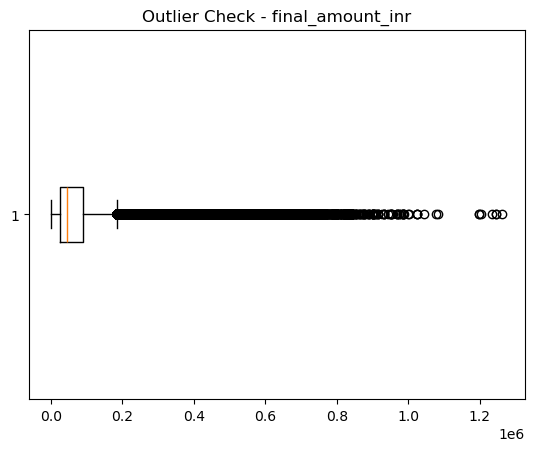

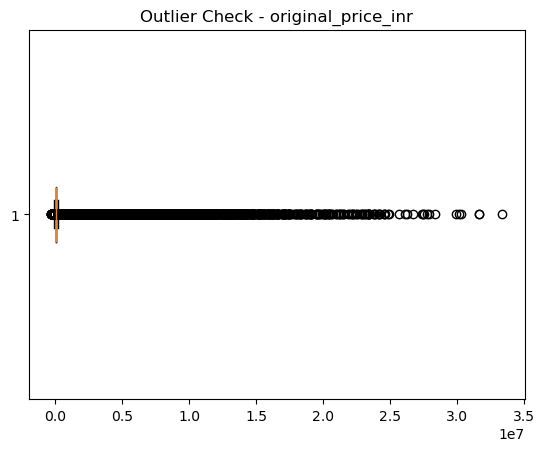

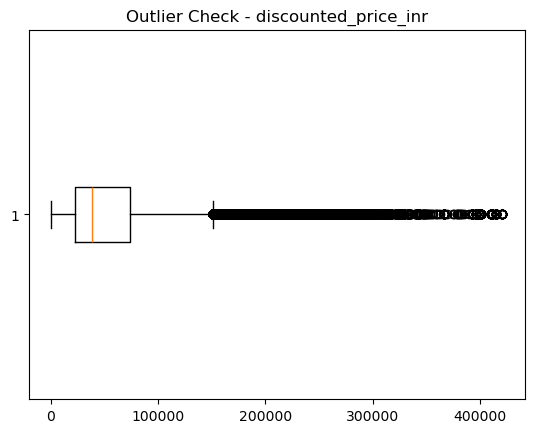

In [60]:
import matplotlib.pyplot as plt
columns = ["final_amount_inr", "original_price_inr", "discounted_price_inr"]

for col in columns:
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Outlier Check - {col}")
    plt.show()

In [61]:
def cal_IQR(dataset, val):
    q1 = dataset.quantile(0.25)
    q3 = dataset.quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    df.loc[dataset < 0, val] = None
    df.loc[dataset > upper_bound, val] = upper_bound


In [ ]:
cal_IQR(df["final_amount_inr"], "final_amount_inr")
cal_IQR(df["original_price_inr"], "original_price_inr")
cal_IQR(df["discounted_price_inr"], "discounted_price_inr")

In [63]:
df[df["final_amount_inr"] < 0]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,...,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating


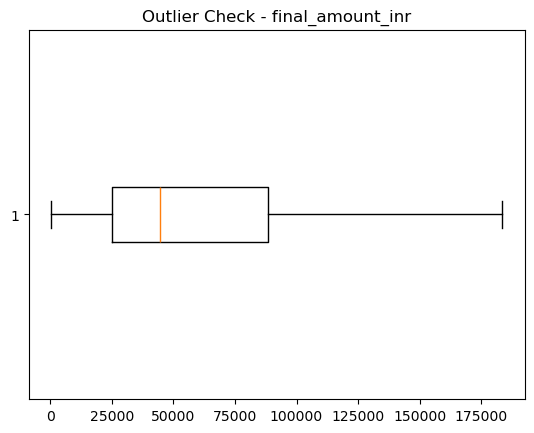

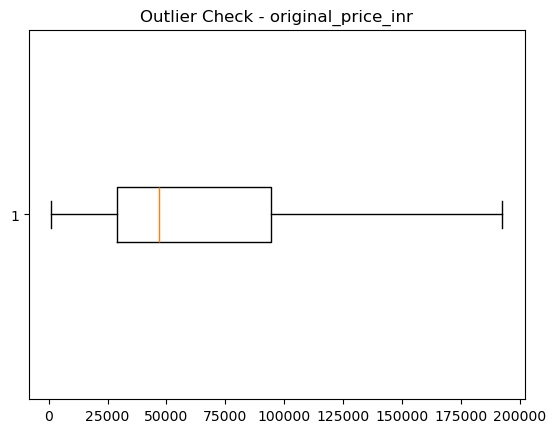

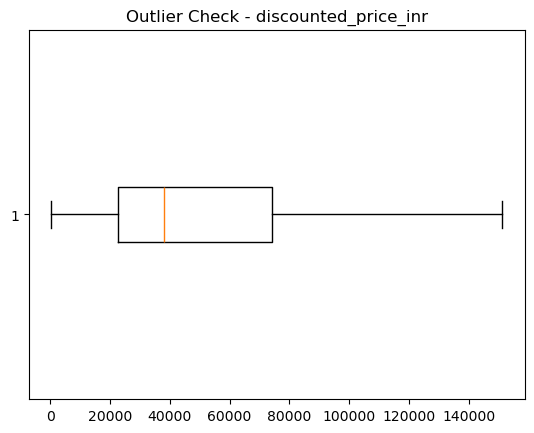

In [64]:
import matplotlib.pyplot as plt
columns = ["final_amount_inr", "original_price_inr", "discounted_price_inr"]

for col in columns:
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Outlier Check - {col}")
    plt.show()

In [65]:
print(df["original_price_inr"].describe())
print(df["discounted_price_inr"].describe())
print(df["final_amount_inr"].describe())

count    1.091187e+06
mean     6.545512e+04
std      4.817507e+04
min      1.067270e+03
25%      2.890339e+04
50%      4.662675e+04
75%      9.437859e+04
max      1.923811e+05
Name: original_price_inr, dtype: float64
count    1.127609e+06
mean     5.266610e+04
std      3.991449e+04
min      3.443300e+02
25%      2.278069e+04
50%      3.800119e+04
75%      7.410332e+04
max      1.510873e+05
Name: discounted_price_inr, dtype: float64
count    1.127609e+06
mean     6.288719e+04
std      4.966897e+04
min      3.443300e+02
25%      2.521799e+04
50%      4.473182e+04
75%      8.852179e+04
max      1.834775e+05
Name: final_amount_inr, dtype: float64


- Identified the oulier which contain negative values and extreme high values
- negative values are replaced with None
- extreme values are replce with upper bound
- now no ouliers exist

- Question 10
- Payment methods contain inconsistent naming: 'UPI/PhonePe/GooglePay', 'Credit Card/CREDIT_CARD/CC', 'Cash on Delivery/COD/C.O.D'. Standardize payment method categories and create a clean categorical hierarchy.


In [66]:
df.columns

Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'festival_name', 'customer_rating', 'return_status', 'order_month',
       'order_year', 'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating'],
      dtype='object')

In [67]:
df["payment_method"].unique()

array(['COD', 'Debit Card', 'Credit Card', 'Net Banking', 'UPI', 'Wallet',
       'BNPL'], dtype=object)

In [68]:
df["payment_method"].isnull().sum()

np.int64(0)

In [69]:
df["payment_method"].head(30)

0             COD
1             COD
2             COD
3             COD
4             COD
5      Debit Card
6     Credit Card
7             COD
8             COD
9             COD
10            COD
11            COD
12            COD
13    Credit Card
14            COD
15    Credit Card
16            COD
17            COD
18            COD
19            COD
20            COD
21    Credit Card
22            COD
23    Net Banking
24            COD
25            COD
26            COD
27            COD
28            COD
29            COD
Name: payment_method, dtype: object

- paymanets methods are already standardized no cleaning required.

In [70]:
#df.to_csv("../data/cleaned/amazon_india_2015_2025_cleaned.csv", index=False)

In [71]:
df.isnull().sum()

transaction_id                 0
order_date                     0
customer_id                    0
product_id                     0
product_name                   0
category                       0
subcategory                    0
brand                          0
original_price_inr         36422
discount_percent               0
discounted_price_inr           0
quantity                       0
subtotal_inr                   0
delivery_charges           90201
final_amount_inr               0
customer_city                  0
customer_state                 0
customer_tier                  0
customer_spending_tier         0
customer_age_group        135315
payment_method                 0
delivery_days               6836
delivery_type                  0
is_prime_member                0
is_festival_sale               0
festival_name             777736
customer_rating           341696
return_status                  0
order_month                    0
order_year                     0
order_quar

In [72]:
(df.isnull().sum() / len(df)) * 100

transaction_id             0.000000
order_date                 0.000000
customer_id                0.000000
product_id                 0.000000
product_name               0.000000
category                   0.000000
subcategory                0.000000
brand                      0.000000
original_price_inr         3.230020
discount_percent           0.000000
discounted_price_inr       0.000000
quantity                   0.000000
subtotal_inr               0.000000
delivery_charges           7.999315
final_amount_inr           0.000000
customer_city              0.000000
customer_state             0.000000
customer_tier              0.000000
customer_spending_tier     0.000000
customer_age_group        12.000170
payment_method             0.000000
delivery_days              0.606239
delivery_type              0.000000
is_prime_member            0.000000
is_festival_sale           0.000000
festival_name             68.972135
customer_rating           30.302702
return_status              0

In [ ]:
df = df.dropna(subset=['original_price_inr'])

In [78]:
df['delivery_charges'] = df['delivery_charges'].fillna(0)

In [79]:
df['customer_age_group'] = df['customer_age_group'].fillna('Unknown')

In [80]:
df['delivery_days'] = df['delivery_days'].fillna(df['delivery_days'].median())

In [81]:
df['festival_name'] = df['festival_name'].fillna('No Festival')

In [82]:
df['customer_rating'] = df['customer_rating'].fillna(df['customer_rating'].median())

In [83]:
df.isnull().sum()

transaction_id            0
order_date                0
customer_id               0
product_id                0
product_name              0
category                  0
subcategory               0
brand                     0
original_price_inr        0
discount_percent          0
discounted_price_inr      0
quantity                  0
subtotal_inr              0
delivery_charges          0
final_amount_inr          0
customer_city             0
customer_state            0
customer_tier             0
customer_spending_tier    0
customer_age_group        0
payment_method            0
delivery_days             0
delivery_type             0
is_prime_member           0
is_festival_sale          0
festival_name             0
customer_rating           0
return_status             0
order_month               0
order_year                0
order_quarter             0
product_weight_kg         0
is_prime_eligible         0
product_rating            0
dtype: int64

In [ ]:
#df.to_csv("../data/cleaned/amazon_india_2015_2025_cleaned.csv", index=False)

In [86]:
df_1 = pd.read_csv("../data/cleaned/amazon_india_2015_2025_cleaned.csv")
df_1.head()

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,...,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2015_00000001,2015-01-25,CUST_2015_00003884,PROD_000021,Samsung Galaxy S6 16GB Black,electronics,Smartphones,Samsung,123614.29,27.91,...,True,Republic Day Sale,5.0,Delivered,1,2015,1,0.19,True,4.7
1,TXN_2015_00000002,2015-01-05,CUST_2015_00011709,PROD_000055,OnePlus OnePlus 2 16GB White,electronics,Smartphones,OnePlus,54731.86,0.00,...,False,No Festival,4.5,Delivered,1,2015,1,0.20,True,4.1
2,TXN_2015_00000003,2015-01-24,CUST_2015_00004782,PROD_000039,Samsung Galaxy Note 5 64GB Black,electronics,Smartphones,Samsung,97644.25,46.93,...,True,Republic Day Sale,4.5,Delivered,1,2015,1,0.17,True,3.3
3,TXN_2015_00000004,2015-01-28,CUST_2015_00008105,PROD_000085,Motorola Moto G (3rd Gen) 16GB Black,electronics,Smartphones,Motorola,21947.26,0.00,...,False,No Festival,3.0,Delivered,1,2015,1,0.22,True,3.5
4,TXN_2015_00000005,2015-01-31,CUST_2015_00002955,PROD_000055,OnePlus OnePlus 2 16GB White,electronics,Smartphones,OnePlus,54731.86,0.00,...,False,No Festival,4.0,Delivered,1,2015,1,0.20,True,4.1


In [87]:
df_1["transaction_id"].duplicated().sum()

np.int64(0)

In [88]:
df_1.columns

Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'festival_name', 'customer_rating', 'return_status', 'order_month',
       'order_year', 'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating'],
      dtype='object')

In [89]:
df_1.isnull().sum()

transaction_id            0
order_date                0
customer_id               0
product_id                0
product_name              0
category                  0
subcategory               0
brand                     0
original_price_inr        0
discount_percent          0
discounted_price_inr      0
quantity                  0
subtotal_inr              0
delivery_charges          0
final_amount_inr          0
customer_city             0
customer_state            0
customer_tier             0
customer_spending_tier    0
customer_age_group        0
payment_method            0
delivery_days             0
delivery_type             0
is_prime_member           0
is_festival_sale          0
festival_name             0
customer_rating           0
return_status             0
order_month               0
order_year                0
order_quarter             0
product_weight_kg         0
is_prime_eligible         0
product_rating            0
dtype: int64